In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

In [2]:
myticker ='TOFB'
df = web.DataReader([myticker], 'yahoo', start='2016-1-1')['Close']
df.columns = {'Close Price'}
df.head(10)

,Close Price
Date,
2016-01-04,4.17
2016-01-05,4.01
2016-01-06,4.01
2016-01-07,3.98
2016-01-08,4.04
2016-01-11,4.04
2016-01-12,3.55
2016-01-13,3.60
2016-01-14,3.75


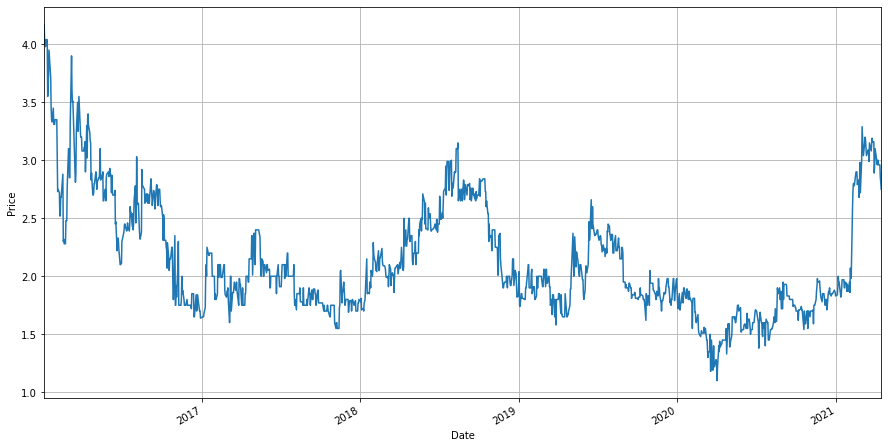

In [3]:
df['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

Create new columns in our dataframe for both the long(i.e. 50 days) and short (i.e 20 days) Exponetial moving averages (EMAs)

In [4]:
df['EMA20'] = df['Close Price'].ewm(span = 20, adjust = False).mean()

In [5]:
df['EMA50'] = df['Close Price'].ewm(span = 50, adjust = False).mean()

In [6]:
df['Signal'] = 0.0  
df['Signal'] = np.where(df['EMA20'] > df['EMA50'], 1.0, 0.0)

In [7]:
df['Position'] = df['Signal'].diff()

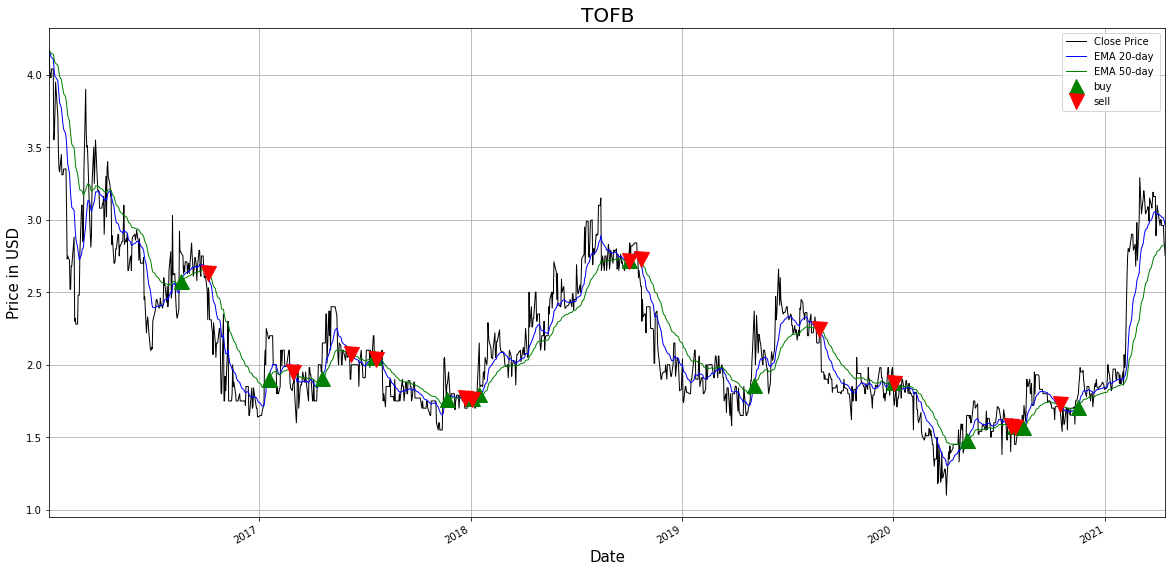

In [8]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
df['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df[df['Position'] == 1].index, 
         df['EMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, 
         df['EMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [9]:

df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   EMA20 |   EMA50 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2016-08-18 00:00:00 |          2.78 | 2.579   | 2.57429 |        1 | Buy        |
| 2016-10-04 00:00:00 |          2.31 | 2.61996 | 2.6309  |        0 | Sell       |
| 2017-01-18 00:00:00 |          2.18 | 1.90293 | 1.90137 |        1 | Buy        |
| 2017-03-01 00:00:00 |          1.87 | 1.94891 | 1.951   |        0 | Sell       |
| 2017-04-20 00:00:00 |          2.15 | 1.91145 | 1.90265 |        1 | Buy        |
| 2017-06-08 00:00:00 |          1.9  | 2.07166 | 2.07316 |        0 | Sell       |
| 2017-07-18 00:00:00 |          2.2  | 2.05535 | 2.0469  |        1 | Buy        |
| 2017-07-21 00:00:00 |          2    | 2.04099 | 2.0416  |        0 | Sell       |
| 2017-11-22 00:00:00 |          1.87 | 1.76299 | 1.76184 |        1 | Buy  